In [ ]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt

In [ ]:
# Escribimos las funciones de Omega de la multiplicidad 
def Om(N,q):
  r = mt.factorial(q+N-1)/(mt.factorial(q)*(mt.factorial(N-1)))
  return r

In [ ]:
q_A, q_B = [],[]

for i in range(0, 101): q_A.append(i)
for i in range(100, -1, -1): q_B.append(i)

In [ ]:
N_A, N_B = 300, 200
OM_A, OM_B = [], []


for i in range(101): OM_A.append(Om(N_A, q_A[i]))
for i in range(101): OM_B.append(Om(N_B, q_B[i]))

In [ ]:
S_A, S_B, k = [], [], 1.380e-23


for i in range(101): S_A.append(mt.log(OM_A[i]))
for i in range(101): S_B.append(mt.log(OM_B[i]))

In [ ]:
S_T = []
for i in range(101): S_T.append(S_A[i]+S_B[i])

In [ ]:
# Definimos la emisividad como un valor menor a 1,
# ya que este valor debe ser menor a 1, pues 1 es para el cuepo negro
# 0.96 es para el agua
ep_0 = 0.96

iT_A, iT_B = [], []

for i in range(101): 
  if i == 0:
    iT_A.append(None)
  else:
    iT_A.append(((3/2)*N_A*k)/(ep_0*q_A[i]))
for i in range(101): 
  if i == 100:
    iT_B.append(None)
  else:
    iT_B.append(((3/2)*N_B*k)/(ep_0*q_B[i]))

#Finalmente calculamos la Omega total
OM_T = []

for i in range(101): OM_T.append(OM_A[i]*OM_B[i])

In [ ]:
# Realizamos la tabla

lf = pd.DataFrame(list(zip(q_A,OM_A, S_A, iT_A,
                           q_B,OM_B, S_B, iT_B,
                           OM_T, S_T)),
                  columns = ["q_A", "\Omega_A", "S_A/k","1/T_A",
                             "q_B", "\Omega_B", "S_B/k","1/T_B",
                             "\Omega_T", "S_T/k"])


# 4a)

# Visualizamos los datos en manera general

In [ ]:
lf

,q_A,\Omega_A,S_A/k,1/T_A,q_B,\Omega_B,S_B/k,1/T_B,\Omega_T,S_T/k
0,0,1.000000e+00,0.000000,NaN,100,2.772168e+81,187.529022,4.312500e-23,2.772168e+81,187.529022
1,1,3.000000e+02,5.703782,6.468750e-21,99,9.271464e+80,186.433749,4.356061e-23,2.781439e+83,192.137531
2,2,4.515000e+04,10.717746,3.234375e-21,98,3.080117e+80,185.331775,4.400510e-23,1.390673e+85,196.049521
3,3,4.545100e+06,15.329560,2.156250e-21,97,1.016335e+80,184.223010,4.445876e-23,4.619344e+86,199.552571
4,4,3.442913e+08,19.656999,1.617188e-21,96,3.330557e+79,183.107362,4.492188e-23,1.146682e+88,202.764361
...,...,...,...,...,...,...,...,...,...,...
96,96,6.338115e+93,215.986995,6.738281e-23,4,6.868505e+07,18.045042,1.078125e-21,4.353337e+101,234.032037
97,97,2.587519e+94,217.393698,6.668814e-23,3,1.353400e+06,14.118131,1.437500e-21,3.501948e+100,231.511829
98,98,1.048209e+95,218.792667,6.600765e-23,2,2.010000e+04,9.908475,2.156250e-21,2.106901e+99,228.701142
99,99,4.214013e+95,220.183999,6.534091e-23,1,2.000000e+02,5.298317,4.312500e-21,8.428026e+97,225.482317


# Una descripción de los datos

In [ ]:
lf.describe()

,q_A,\Omega_A,S_A/k,1/T_A,q_B,\Omega_B,S_B/k,1/T_B,\Omega_T,S_T/k
count,101.000000,1.010000e+02,101.000000,1.000000e+02,101.000000,1.010000e+02,101.000000,1.000000e+02,1.010000e+02,101.000000
mean,50.000000,2.219658e+94,132.056243,3.355585e-22,50.000000,4.117081e+79,114.073487,2.237057e-22,9.170060e+113,246.129730
std,29.300171,1.722380e+95,61.339653,7.598212e-22,29.300171,2.912002e+80,51.452759,5.065475e-22,1.912370e+114,19.131819
min,0.000000,1.000000e+00,0.000000,6.468750e-23,0.000000,1.000000e+00,0.000000,4.312500e-23,2.772168e+81,187.529022
25%,25.000000,1.446498e+37,85.564794,8.596628e-23,25.000000,9.150890e+32,75.896574,5.731086e-23,4.316747e+102,236.326182
50%,50.000000,1.138019e+61,140.586980,1.281066e-22,50.000000,1.078234e+53,122.112334,8.540441e-23,7.703305e+109,253.023425
75%,75.000000,1.288760e+80,184.460488,2.512861e-22,75.000000,3.754854e+68,157.898836,1.675240e-22,3.852126e+113,261.540741
max,100.000000,1.681391e+96,221.567790,6.468750e-21,100.000000,2.772168e+81,187.529022,4.312500e-21,6.866305e+114,264.421327


# Primeros 10 y últimos 10 así como 10 de en medio

In [ ]:
lf.head(10)

,q_A,\Omega_A,S_A/k,1/T_A,q_B,\Omega_B,S_B/k,1/T_B,\Omega_T,S_T/k
0,0,1.000000e+00,0.000000,NaN,100,2.772168e+81,187.529022,4.312500e-23,2.772168e+81,187.529022
1,1,3.000000e+02,5.703782,6.468750e-21,99,9.271464e+80,186.433749,4.356061e-23,2.781439e+83,192.137531
2,2,4.515000e+04,10.717746,3.234375e-21,98,3.080117e+80,185.331775,4.400510e-23,1.390673e+85,196.049521
3,3,4.545100e+06,15.329560,2.156250e-21,97,1.016335e+80,184.223010,4.445876e-23,4.619344e+86,199.552571
4,4,3.442913e+08,19.656999,1.617188e-21,96,3.330557e+79,183.107362,4.492188e-23,1.146682e+88,202.764361
5,5,2.093291e+10,23.764589,1.293750e-21,95,1.083842e+79,181.984735,4.539474e-23,2.268798e+89,205.749323
6,6,1.064090e+12,27.693141,1.078125e-21,94,3.502212e+78,180.855032,4.587766e-23,3.726667e+90,208.548173
7,7,4.651592e+13,31.470816,9.241071e-22,93,1.123576e+78,179.718154,4.637097e-23,5.226419e+91,211.188970
8,8,1.785049e+15,35.118222,8.085938e-22,92,3.578514e+77,178.574000,4.687500e-23,6.387821e+92,213.692222
9,9,6.108833e+16,38.651097,7.187500e-22,91,1.131351e+77,177.422465,4.739011e-23,6.911237e+93,216.073562


In [ ]:
lf.tail(10)

,q_A,\Omega_A,S_A/k,1/T_A,q_B,\Omega_B,S_B/k,1/T_B,\Omega_T,S_T/k
91,91,4.959123e+90,208.833887,7.108516e-23,9,1.684982e+15,35.060531,4.791667e-22,8.356034e+105,243.894419
92,92,2.107627e+91,210.280806,7.031250e-23,8,7.290789e+13,31.920218,5.390625e-22,1.536627e+105,242.201024
93,93,8.883762e+91,211.719469,6.955645e-23,7,2.817696e+12,28.666941,6.160714e-22,2.503174e+104,240.386409
94,94,3.714169e+92,213.149983,6.881649e-23,6,9.574696e+10,25.284975,7.187500e-22,3.556203e+103,238.434958
95,95,1.540403e+93,214.572457,6.809211e-23,5,2.802350e+09,21.753724,8.625000e-22,4.316747e+102,236.326182
96,96,6.338115e+93,215.986995,6.738281e-23,4,6.868505e+07,18.045042,1.078125e-21,4.353337e+101,234.032037
97,97,2.587519e+94,217.393698,6.668814e-23,3,1.353400e+06,14.118131,1.437500e-21,3.501948e+100,231.511829
98,98,1.048209e+95,218.792667,6.600765e-23,2,2.010000e+04,9.908475,2.156250e-21,2.106901e+99,228.701142
99,99,4.214013e+95,220.183999,6.534091e-23,1,2.000000e+02,5.298317,4.312500e-21,8.428026e+97,225.482317
100,100,1.681391e+96,221.567790,6.468750e-23,0,1.000000e+00,0.000000,NaN,1.681391e+96,221.567790


In [ ]:
lf.take([55,56,58,59, 60,61,62, 64,65])

,q_A,\Omega_A,S_A/k,1/T_A,q_B,\Omega_B,S_B/k,1/T_B,\Omega_T,S_T/k
55,55,1.473125e+65,150.055417,1.176136e-22,45,2.982131e+49,113.919308,9.583333e-23,4.393050e+114,263.974724
56,56,9.338557e+65,151.902183,1.155134e-22,44,5.499832e+48,112.228802,9.801136e-23,5.136049e+114,264.130985
58,58,3.590006e+67,155.551355,1.115302e-22,42,1.769493e+47,108.792193,1.026786e-22,6.352491e+114,264.343548
59,59,2.178343e+68,157.354351,1.096398e-22,41,3.083764e+46,107.045065,1.051829e-22,6.717494e+114,264.399416
60,60,1.303375e+69,159.143328,1.078125e-22,40,5.268097e+45,105.277998,1.078125e-22,6.866305e+114,264.421327
61,61,7.692049e+69,160.918559,1.060451e-22,39,8.816899e+44,103.490414,1.105769e-22,6.782001e+114,264.408973
62,62,4.478757e+70,162.680302,1.043347e-22,38,1.444786e+44,101.681705,1.134868e-22,6.470846e+114,264.362007
64,64,1.459662e+72,166.164331,1.010742e-22,36,3.631855e+42,97.998317,1.197917e-22,5.301279e+114,264.162649
65,65,8.174106e+72,167.887098,9.951923e-23,35,5.563692e+41,96.122251,1.232143e-22,4.547821e+114,264.009349


#Notamos que el valor de en medio es el 60 y vemos esto en la siguiente gráfica también

In [ ]:
lf.take([60])

,q_A,\Omega_A,S_A/k,1/T_A,q_B,\Omega_B,S_B/k,1/T_B,\Omega_T,S_T/k
60,60,1.303375e+69,159.143328,1.078125e-22,40,5.268097e+45,105.277998,1.078125e-22,6.866305e+114,264.421327


# Realizamos una grafica para estos datos

In [ ]:
x = np.linspace(0,100,101)

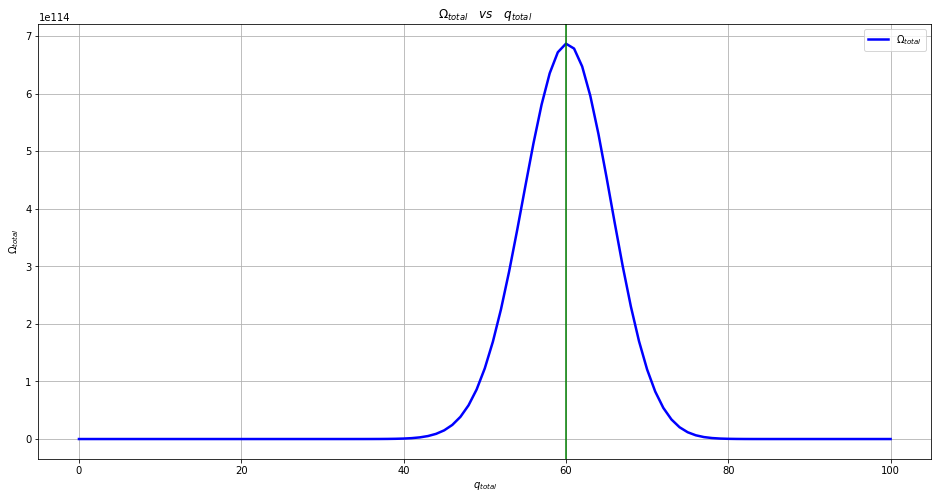

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel(r"$q_{total}$")
plt.ylabel(r"$\Omega _{total}$")
plt.title(r"$\Omega _{total} \ \ \ vs \ \ \ q_{total}$")
plt.plot(x, OM_T, color="blue", linewidth=2.5, linestyle="-", label= r"$\Omega _{total}$")
plt.legend(loc='upper right')
plt.axvline(x=60, ymin=0, ymax=max(OM_T), color="green")
plt.grid()
plt.show()

# Mostramos también de la Entropía Normalizda

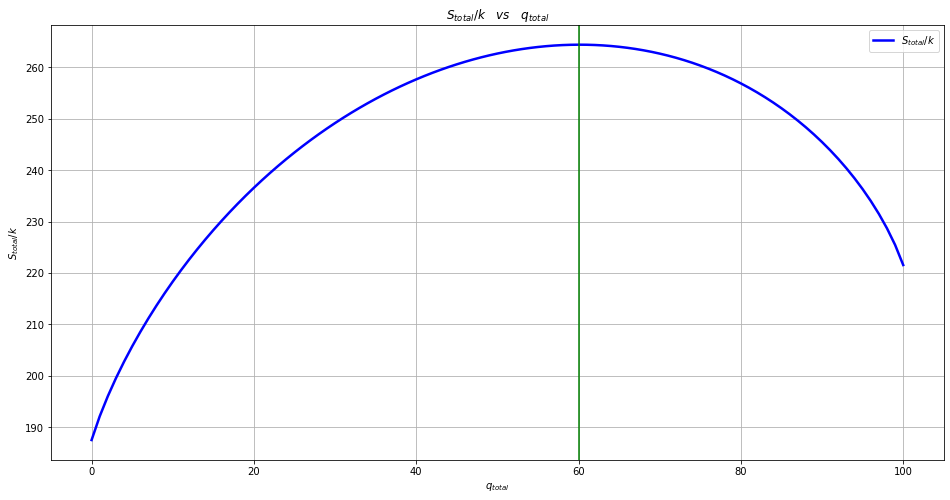

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel(r"$q_{total}$")
plt.ylabel(r"$S_{total}/k$")
plt.title(r"$S_{total}/k \ \ \ vs \ \ \ q_{total}$")
plt.plot(x, S_T, color="blue", linewidth=2.5, linestyle="-", label= r"$S_{total}/k$")
plt.legend(loc='upper right')
plt.axvline(x=60, ymin=0, ymax=max(S_T), color="green")
plt.grid()
plt.show()

# 4b)


De lo anterior vemos que este valor es para:

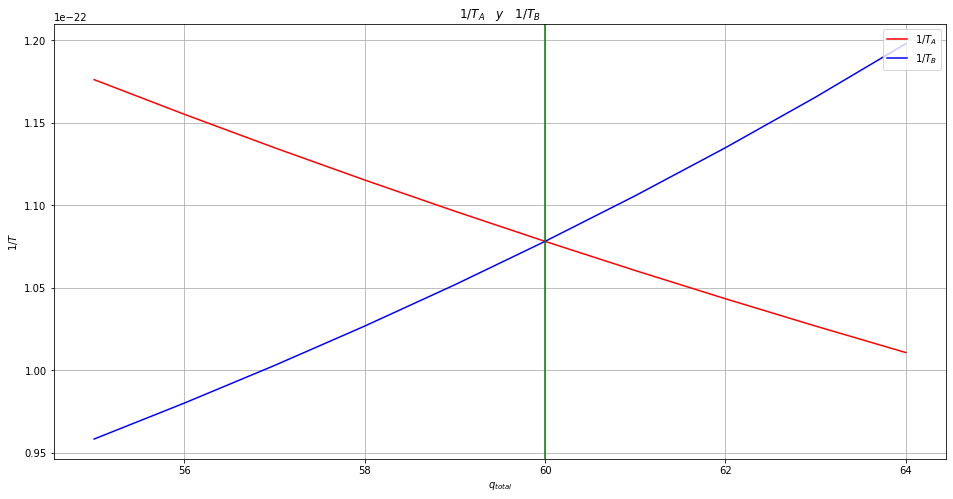

In [ ]:
# Graficamos las 2 para ver este valor

plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel(r"$q_{total}$")
plt.ylabel(r"$1/T$")
plt.title(r"$1/T_A \ \ \ y \ \ \ 1/T_B$")
plt.plot(x[55:65], iT_A[55:65], color="red", linewidth=1.5, linestyle="-", label= r"$1/T_A$")
plt.plot(x[55:65], iT_B[55:65], color="blue", linewidth=1.5, linestyle="-", label= r"$1/T_B$")
plt.legend(loc='upper right')
plt.axvline(x=60, ymin=0, ymax=max(S_T), color="green")
plt.grid()
plt.show()

In [ ]:
lf.take([60])

,q_A,\Omega_A,S_A/k,1/T_A,q_B,\Omega_B,S_B/k,1/T_B,\Omega_T,S_T/k
60,60,1.303375e+69,159.143328,1.078125e-22,40,5.268097e+45,105.277998,1.078125e-22,6.866305e+114,264.421327


Vemos que estas temperaturas y entropía normalizada es

\begin{equation}
\frac{1}{T_A} \approx \frac{1}{T_B} = 1.078125x10^{-22}
\end{equation}

Para la entropía normalizada es,
\begin{equation}
\frac{S_T}{k} = 264.421327
\end{equation}


# 4c)

Vemos las gráficas juntas

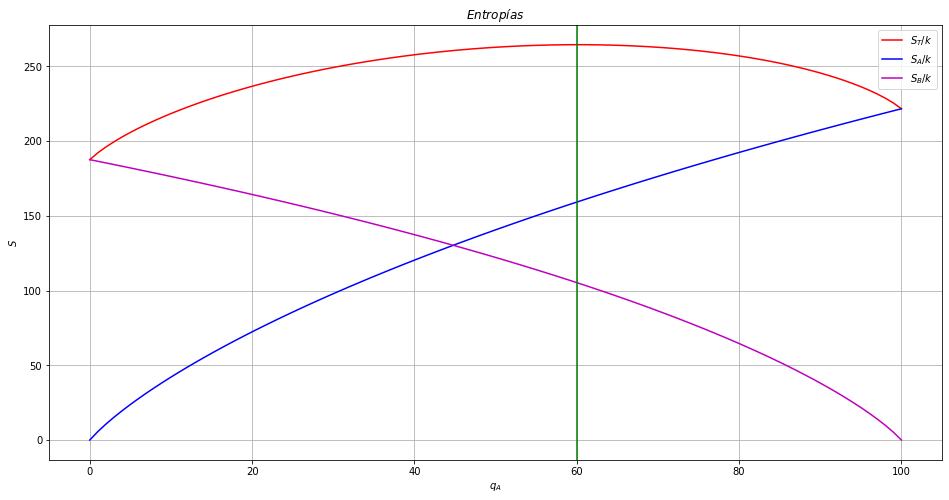

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)
plt.xlabel(r"$q_A$")
plt.ylabel(r"$S$")
plt.title(r"$Entropías$")
plt.plot(x, S_T, color="red", linewidth=1.5, linestyle="-", label= r"$S_T/k$")
plt.plot(x, S_A, color="blue", linewidth=1.5, linestyle="-", label= r"$S_A/k$")
plt.plot(x, S_B, color="m", linewidth=1.5, linestyle="-", label= r"$S_B/k$")
plt.legend(loc='upper right')
plt.axvline(x=60, ymin=0, ymax=max(S_T), color="green")
plt.grid()
plt.show()

De esta gráfica vemos y podemos intuir el intercambio de energía así como el máximo de la entropía.